<a href="https://colab.research.google.com/github/TPYogalashmi/Sentiment-Analysis/blob/main/Project_2_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries & DataSet**

In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Load Training & Testing DataSet**

Import the Dataset from
https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data

In [45]:
train_data = pd.read_csv('/content/train.csv.zip',encoding='latin1');
test_data = pd.read_csv('/content/test.csv',encoding='latin1');
df = pd.concat([train_data,test_data])

### **EXPLORATORY DATA ANALYSIS**

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB
None


In [47]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


### Removing unnecessary columns

In [48]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

In [49]:
# Remove rows with missing values in any column
df.dropna(inplace=True)


**Analyse the specific features**

In [50]:
print(df["text"].unique())

[' I`d have responded, if I were going'
 ' Sooo SAD I will miss you here in San Diego!!!'
 'my boss is bullying me...' ...
 ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx'
 ' But it was worth it  ****.'
 '   All this flirting going on - The ATG smiles. Yay.  ((hugs))']


In [51]:
print(df["text"].value_counts())


 I`d have responded, if I were going                                                                                                      1
Watchin Hollyoaks...poor Justin!                                                                                                          1
WAH. i`m gonna miss bowie people  ESP YOU ALYANNA BONDOC <3 and Cesar. D:< I dunno if I can survive without my SOSA!                      1
 aww  that`s horrible! xD                                                                                                                 1
My new camera... http://tinyurl.com/l8pde3 ... RIP my hot pink Polaroid i733                                                              1
                                                                                                                                         ..
 oooh lush. i cant sunbathe i burn way to easily even with sun cream   im great thanks lovely sunny day no?                               1
hmz... second most p

**Distribution of sentiment label**

In [52]:
# Check the unique values of the sentiment label
print(df["sentiment"].unique())

# Calculate the distribution of sentiment labels
print(df["sentiment"].value_counts())

['neutral' 'negative' 'positive']
neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64


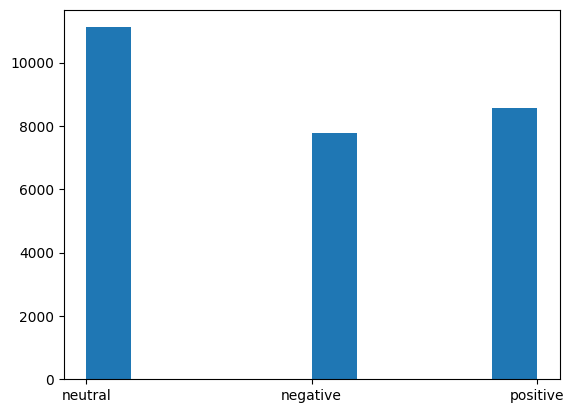

In [53]:
plt.hist(df["sentiment"])
plt.show()


 **PIE CHART REPRESENTATION**






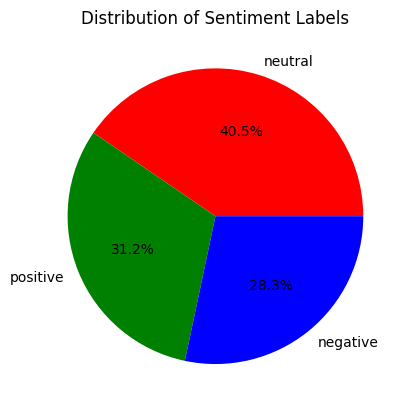

In [54]:
sentiment_counts = df['sentiment'].value_counts(normalize=True)
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'blue'])

plt.title('Distribution of Sentiment Labels')
plt.ylabel('')
plt.show()


##**TEXT PREPROCESING :**

*   Tasks including lowercasing, removing stop words, and handling special characters
*  Tokenize and lemmatize words to prepare the text for sentiment analysis.

In [55]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])


27480
 I`d have responded, if I were going


In [56]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text
            if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: user 3.1 s, sys: 21 ms, total: 3.12 s
Wall time: 3.3 s


In [57]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values
data_cleaned['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [19]:
data_cleaned.head()

,text,sentiment
0,responded going,neutral
1,sooo sad miss san diego,negative
2,bos bullying,negative
3,interview leave alone,negative
4,son put release already bought,negative


In [58]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"[responded, going]",neutral
1,"[sooo, sad, miss, san, diego]",negative
2,"[bos, bullying]",negative
3,"[interview, leave, alone]",negative
4,"[son, put, release, already, bought]",negative


**SPILTTING THE DATASET**

In [59]:
import string

def wp(text):
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        return text

# Assuming df is defined somewhere in your code
df['selected_text'] = df["selected_text"].apply(wp)


In [60]:
X=df['selected_text']
y= df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Text Vectorization**

In [23]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

### **MODEL SELECTION AND EVALUVATION METRICS**

**Logistic Regression Model and its evaluvation Metrics**

In [61]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [62]:
pred_lr=lr.predict(XV_test)
score_lr = accuracy_score(y_test, pred_lr)
print(" Accuracy is:", score_lr)
print(classification_report(y_test, pred_lr))

 Accuracy is: 0.8286026200873362
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



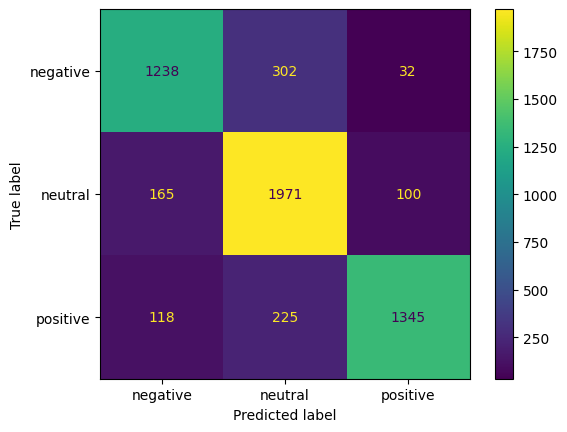

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);


**Decision Tree and its evaluvation metrics**

In [64]:
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)
pred_dt = dt.predict(XV_test)
score_dt = dt.score(XV_test, y_test)
print(" Accuracy is:", score_dt)

 Accuracy is: 0.7616448326055313


In [65]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.70      0.75      0.72      1572
     neutral       0.76      0.77      0.77      2236
    positive       0.83      0.76      0.79      1688

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.76      0.76      0.76      5496



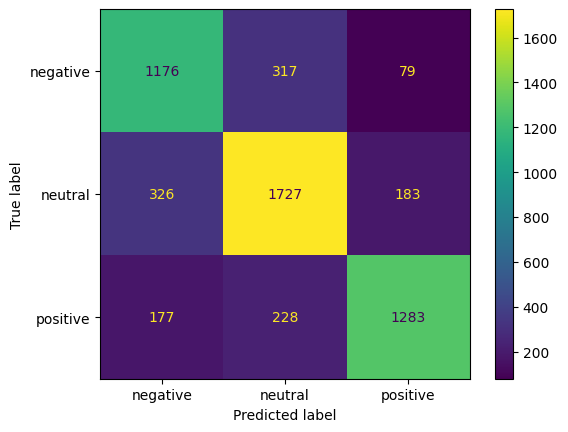

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);


**Random Forest Classification and its evaluvation metrics**

In [67]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
pred_rfc = rfc.predict(XV_test)
score_rfc = rfc.score(XV_test, y_test)
print(" Accuracy is:", score_rfc)

 Accuracy is: 0.8116812227074236


In [69]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.77      1572
     neutral       0.77      0.90      0.83      2236
    positive       0.92      0.75      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



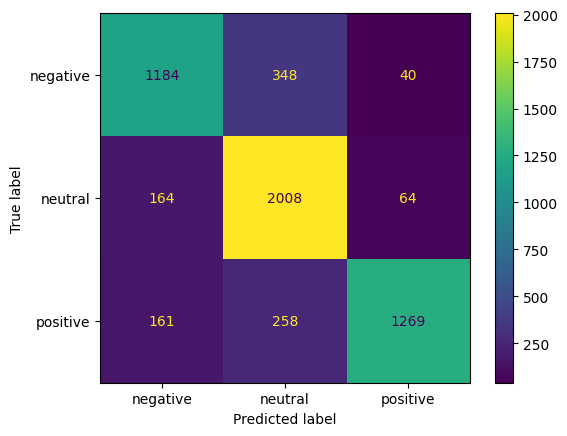

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

## **CONCLUSION**

We can see that the Logistic regression model performs best with least overfitting as compared to other models and has better precision too.

In [71]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandom Forest Classifier {score_rfc}')

Baseline model:0.40454876273653567 
Logistic regression 0.8286026200873362
Decision Tree Classification 0.7616448326055313
Random Forest Classifier 0.8116812227074236
